## Observations and Insights 

1. Among all the regimens that conducted treatments across 25 mice, Capomulin and Ramicane conducted the most treatments with a total of 230 and 228 respectively as shown in the bar plot. Ceftamin and Infubinol both conducted 178 treatments. The similarities in treatment rates suggest this as a possible reason for the homework's focus on the two pairs to compare and contrast results with in the box plot. 

2. The box plot tells us that Capomulin and Ramicane regimens (Team A) achieved better results with lower Tumor Volume sizes among their mice at the end of the treatment regimens compared with Ceftamin and Infubinol (Team B). Looking at other variables, a summary table created to display the regimens according to the weight of their sample size helped reveal that Team B's sample sizes both had a higher average weight. 

3.  The line graph tells us that the regimen conducted by Capomulin from Team A had been a success as the graph depicts a reduction in tumor size over the treatment period. A duplicate dataplot with data of a mouse treated with Ceftamin from Team B shows that the mouse's condition not only did not improve but deteriorated overtime. This leads us to infer on the possibility that the heavier a mouse is, the more challenging it is to treat. 

4. The scatter plot for the Capomulin regimen along with its correlation coefficient confirms the correlation between weight and tumor size. Although successful, the linear regression model suggests that mice with more weight on average had higher tumor volumes at the end of their treatment compared with the mice with less weight. On the other hand, the scatter plot duplicated to show data from mice treated with Ceftamin shows no clear correlation between weight and tumor volume. 

5. Looking back at the comparative assessments done on the line graphs, it is possible to entertain that the reason for the unclear correlation between weight and tumor volume from mice treated with Ceftamin is due to the data having a combination of opposing mice conditions after the regimen from some that improved to others that deterioated. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(combined_df["Mouse ID"].unique())
mice_count
print(f"There are {mice_count} mice in the combined dataset.")

There are 249 mice in the combined dataset.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[~combined_df["Mouse ID"].isin(["g989"])]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df_micecount = len(cleaned_df["Mouse ID"].unique())
print(f"There are {cleaned_df_micecount} mice in the clean DataFrame.")

There are 248 mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = cleaned_df.groupby("Drug Regimen")
grouped_regimen.count()

# This method is the most straighforward, creating multiple series 
mean_regimen = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].mean())
med_regimen = grouped_regimen["Tumor Volume (mm3)"].median()
var_regimen = grouped_regimen["Tumor Volume (mm3)"].var()
sdev_regimen = grouped_regimen["Tumor Volume (mm3)"].std()
sem_regimen = grouped_regimen["Tumor Volume (mm3)"].sem()

# and putting them all together at the end.
regimen_summ1 = mean_regimen.merge(med_regimen, left_index=True, right_index=True)
regimen_summ1 = regimen_summ1.merge(var_regimen, left_index=True, right_index=True)
regimen_summ2 = regimen_summ1.merge(sdev_regimen, left_index=True, right_index=True)
regimen_summary = regimen_summ2.merge(sem_regimen, left_index=True, right_index=True)
regimen_summary.columns = ["TumorVolume_Mean", "TumorVolume_Median", "TumorVolume_Variance", "TumorVolume_StandardDeviation", "TumorVolume_SEM"]
regimen_summary 

,TumorVolume_Mean,TumorVolume_Median,TumorVolume_Variance,TumorVolume_StandardDeviation,TumorVolume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
regimensummary = grouped_regimen.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
regimensummary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

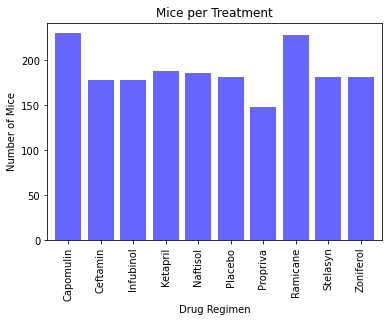

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treated = cleaned_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 
mice_treated.plot(kind="bar", width=0.8, color='b', alpha=0.6, figsize=(6,4))

plt.title("Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

<BarContainer object of 10 artists>

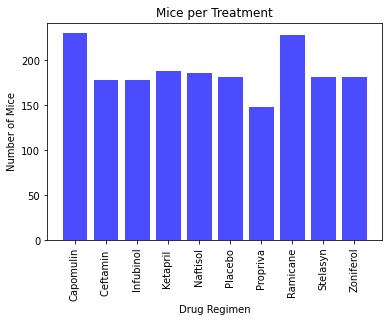

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice = grouped_regimen["Mouse ID"].count()
x_axis = np.arange(len(mice))
drugs = ["Capomulin", "Ceftamin ", "Infubinol", "Ketapril ", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation="vertical")

plt.title("Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.bar(x_axis, mice, color='b', alpha=0.7, align="center")

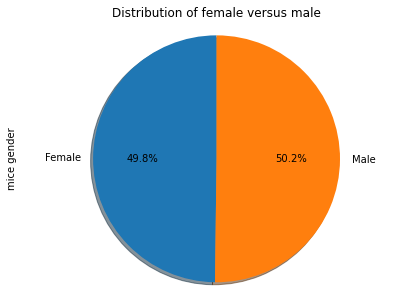

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_genders = mouse_metadata.groupby("Sex").count()
mice_genders = grouped_genders["Mouse ID"]

mice_genders.plot(kind="pie", figsize=(7,5), autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Distribution of female versus male')
plt.ylabel('mice gender')
plt.show()

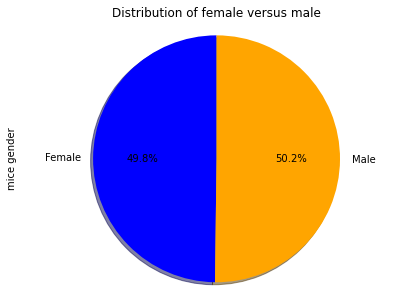

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue","orange"]

pyplot_pie = mice_genders.plot.pie(y='sizes', figsize=(7, 5), shadow=True, colors=colors, autopct="%1.1f%%", startangle=90)

plt.axis('equal')
plt.title('Distribution of female versus male')
plt.ylabel('mice gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treat = cleaned_df[cleaned_df["Drug Regimen"].isin(["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])]
four_treat

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [14]:
# Start by getting the last (greatest) timepoint for each mouse
last_mice_record = four_treat.drop_duplicates("Mouse ID", keep='last')
last_mice_record

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [15]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_treat_df = last_mice_record[["Mouse ID", "Drug Regimen", "Weight (g)", "Timepoint", "Tumor Volume (mm3)"]]
four_treat_df

,Mouse ID,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,16,45,22.050126
19,s185,Capomulin,17,45,23.343598
29,x401,Capomulin,15,45,28.484033
39,m601,Capomulin,17,45,28.430964
49,g791,Ramicane,16,45,29.128472
...,...,...,...,...,...
1797,x822,Ceftamin,29,45,61.386660
1813,y163,Infubinol,27,45,67.685569
1845,y769,Ceftamin,27,45,68.594745
1855,y865,Ceftamin,26,45,64.729837


In [16]:
# check if the final values in the output are correct
mousetocheck = cleaned_df.loc[cleaned_df["Mouse ID"] == "g791",:]
mousetocheck

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
40,g791,Ramicane,Male,11,16,0,45.000000,0
41,g791,Ramicane,Male,11,16,5,45.851531,0
42,g791,Ramicane,Male,11,16,10,40.170558,0
43,g791,Ramicane,Male,11,16,15,40.678129,0
44,g791,Ramicane,Male,11,16,20,41.211897,0
45,g791,Ramicane,Male,11,16,25,35.569399,1
46,g791,Ramicane,Male,11,16,30,34.952583,1
47,g791,Ramicane,Male,11,16,35,30.960392,1
48,g791,Ramicane,Male,11,16,40,31.369406,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
four_last_tumor = four_treat_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = four_last_tumor.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
print(f"The interquartile range is: {iqr}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
mice_treatment_tumor = pd.DataFrame(four_treat_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]])

    # add subset 
cap_treat = four_treat_df.loc[four_treat_df["Drug Regimen"] == "Capomulin",:]
cef_treat = four_treat_df.loc[four_treat_df["Drug Regimen"] == "Ceftamin",:]
inf_treat = four_treat_df.loc[four_treat_df["Drug Regimen"] == "Infubinol",:]
ram_treat = four_treat_df.loc[four_treat_df["Drug Regimen"] == "Ramicane",:]
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")

The interquartile range is: 22.74251795250001
Values below 3.0739668737499812 and above 94.04403868375002 could be outliers.


In [18]:
# doublecheck lower and upper quartiles
four_treat_df.describe()

,Weight (g),Timepoint,Tumor Volume (mm3)
count,100.000000,100.000000,100.000000
mean,23.710000,35.700000,47.197795
std,4.472802,14.442852,12.953884
min,15.000000,0.000000,22.050126
25%,20.000000,30.000000,37.187744
50%,25.000000,45.000000,45.000000
75%,27.250000,45.000000,59.930262
max,30.000000,45.000000,72.226731


<function matplotlib.pyplot.show(*args, **kw)>

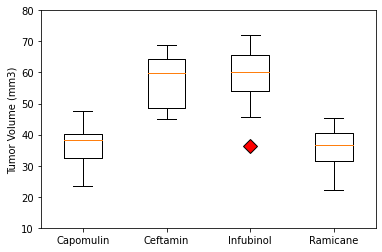

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumvol_lists = pd.DataFrame(mice_treatment_tumor.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list))
tumvols = [vol for vol in tumvol_lists["Tumor Volume (mm3)"]]
plt.ylim(10, 80)
plt.ylabel('Tumor Volume (mm3)')
flierprops = dict(marker='D', markerfacecolor='r', markersize=10)
box = plt.boxplot(tumvols, labels=treatments, flierprops=flierprops)
plt.show

In [20]:
# doublecheck output with summary data of the sample weight per regimen to find possible relation of tumor volume at the end of the regimen with the sample size weight 
cap_wt = pd.DataFrame(cap_treat["Weight (g)"].describe())
cef_wt = cef_treat["Weight (g)"].describe()
inf_wt = inf_treat["Weight (g)"].describe()
ram_wt = ram_treat["Weight (g)"].describe()

desc_summary1 = cap_wt.merge(cef_wt, left_index=True, right_index=True)
desc_summary2 = desc_summary1.merge(inf_wt, left_index=True, right_index=True)
desc_summary = desc_summary2.merge(ram_wt, left_index=True, right_index=True)
desc_summary.columns = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
desc_summary

,Capomulin,Ceftamin,Infubinol,Ramicane
count,25.0000,25.000000,25.00000,25.000000
mean,20.1200,27.400000,27.32000,20.000000
std,2.8624,1.683251,2.17409,3.354102
min,15.0000,25.000000,23.00000,16.000000
25%,17.0000,26.000000,25.00000,17.000000
50%,21.0000,28.000000,27.00000,19.000000
75%,22.0000,28.000000,29.00000,24.000000
max,25.0000,30.000000,30.00000,25.000000


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

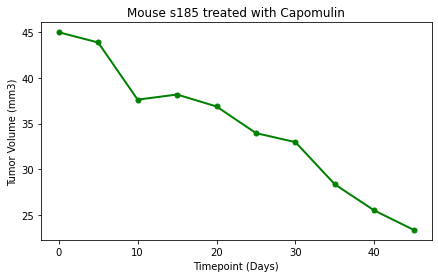

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mousefrom_cap_treat = cleaned_df.loc[cleaned_df["Mouse ID"] == "s185",:]
amouse_timepoint_tumvol = mousefrom_cap_treat[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]

x_axis = amouse_timepoint_tumvol["Timepoint"]
tum_vols = amouse_timepoint_tumvol["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.plot(x_axis, tum_vols, linewidth=2, markersize=10, marker=".", color="green")

plt.title('Mouse s185 treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Tumor Volume (mm3)')

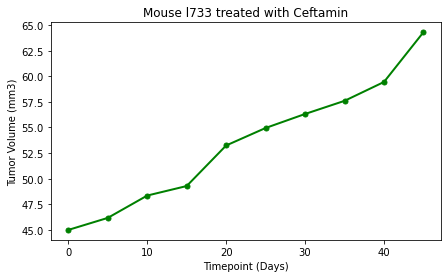

In [22]:
# Compare above data with data of a mouse treated with Ceftamin by displaying (cef_treat) syntax
mousefrom_cef_treat = cleaned_df.loc[cleaned_df["Mouse ID"] == "l733",:]
amouse_timepoint_tumvol = mousefrom_cef_treat[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]

x_axis = amouse_timepoint_tumvol["Timepoint"]
tum_vols = amouse_timepoint_tumvol["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.plot(x_axis, tum_vols, linewidth=2, markersize=10, marker=".", color="green")

plt.title('Mouse l733 treated with Ceftamin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [23]:
# double check if the final values in the output are correct
mousetocheck = cleaned_df.loc[cleaned_df["Mouse ID"] == "l733",:]
mousetocheck

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1153,l733,Ceftamin,Female,4,30,0,45.000000,0
1154,l733,Ceftamin,Female,4,30,5,46.174226,0
1155,l733,Ceftamin,Female,4,30,10,48.354952,0
1156,l733,Ceftamin,Female,4,30,15,49.285195,0
1157,l733,Ceftamin,Female,4,30,20,53.244312,1
1158,l733,Ceftamin,Female,4,30,25,54.951668,1
1159,l733,Ceftamin,Female,4,30,30,56.319065,1
1160,l733,Ceftamin,Female,4,30,35,57.600798,1
1161,l733,Ceftamin,Female,4,30,40,59.443506,1
1162,l733,Ceftamin,Female,4,30,45,64.299830,1


Text(0, 0.5, 'Average Tumor Volume (mm3)')

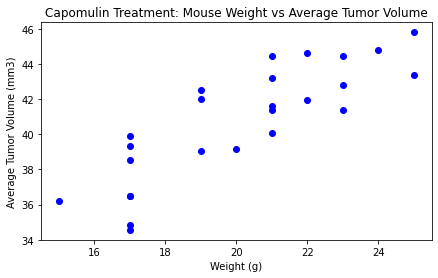

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
onlycap = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
onlycap_uniquemice = onlycap["Mouse ID"].unique()
groupedmice_onlycap = onlycap.groupby("Mouse ID")
capmice_weight = groupedmice_onlycap["Weight (g)"].mean()
capmice_avetumvol = groupedmice_onlycap["Tumor Volume (mm3)"].mean()

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(capmice_weight, capmice_avetumvol, color="blue")

plt.title('Capomulin Treatment: Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

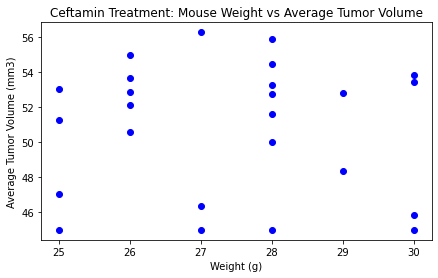

In [25]:
# Compare above data with data of a mouse treated with Ceftamin 
onlycef = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin",:]
onlycef_uniquemice = onlycef["Mouse ID"].unique()
groupedmice_onlycef = onlycef.groupby("Mouse ID")
cefmice_weight = groupedmice_onlycef["Weight (g)"].mean()
cefmice_avetumvol = groupedmice_onlycef["Tumor Volume (mm3)"].mean()

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(cefmice_weight, cefmice_avetumvol, color="blue")

plt.title('Ceftamin Treatment: Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [26]:
# For mouse weight and average tumor volume for the Capomulin regimen,
# Calculate the correlation coefficient 
corr = round(st.pearsonr(capmice_weight, capmice_avetumvol,)[0],2)
print(f"The correlation coefficient for mouse weight and average tumor volume is {corr}")

# and linear regression model 
x_values = capmice_weight
y_values = capmice_avetumvol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression equation for mouse weight and average tumor volume is {line_eq}")

The correlation coefficient for mouse weight and average tumor volume is 0.84
The linear regression equation for mouse weight and average tumor volume is y = 0.95x + 21.55


Text(17, 41, 'y = 0.95x + 21.55')

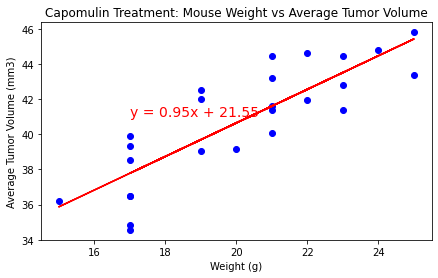

In [27]:
# linear regression model 
fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(capmice_weight, capmice_avetumvol, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Capomulin Treatment: Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
ax1.annotate(line_eq, (17,41), fontsize=14, color="red")